In [559]:
import pandas as pd
import numpy as np
from plotnine import *
import scipy.stats as stats
import statsmodels.formula.api as smf

In [560]:
df = pd.read_csv("Clean_df.csv")

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Unnamed: 0                                                                                                               1039 non-null   int64  
 1   Age                                                                                                                      1039 non-null   float64
 2   Gender                                                                                                                   1039 non-null   object 
 3   City                                                                                                                     1036 non-null   o

There is a row that has an unreasonably large salary and bonus, we will remove that row in the following cell:

In [562]:
#Removes the one big salary outlier
df = df.sort_values("Yearly brutto salary (without bonus and stocks) in EUR", ascending = False).iloc[1:, :]
df.head()

,Unnamed: 0,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
641,641,42.0,Male,Berlin,Frontend Developer,18.0,5.0,Senior,React.js,Javascript / Typescript,...,82000,35.0,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,Yes,0.0,5000.0
518,518,40.0,Male,NaN,Software Engineer,20.0,0.0,Lead,Swift,No Response,...,300000,45.0,Full-time,Unlimited contract,English,1000+,Utilities and Manufacturing,No,0.0,0.0
662,662,20.0,Male,Berlin,Mobile Developer,5.0,2.0,Lead,C#,.NET,...,No Response,27.0,Full-time,Unlimited contract,English,1000+,Utilities and Manufacturing,Yes,0.0,0.0
469,469,38.0,Male,Berlin,Freelance AI lead / advisor,20.0,7.0,Lead,C,"Python, C/C++, Docker",...,80000,0.0,Self-employed,Unlimited contract,English,up to 10,Business Services,Yes,0.0,0.0
359,359,32.0,Male,Berlin,C-Level,10.0,4.0,C-Level,Java,"Python, C/C++",...,No Response,28.0,Full-time,Unlimited contract,English,101-1000,Utilities and Manufacturing,Yes,0.0,0.0


# Analysis of Total Compensation vs Age

First we segment out the columns of interest

In [563]:
df_age_yearlysalary = df[["Age", "Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Gender"]].copy()
df_age_yearlysalary.columns = ["Age", "Yearly salary", "Bonus", "Gender"]

df_age_yearlysalary.sort_values("Yearly salary", ascending = False, inplace = True)
df_age_yearlysalary.head()

,Age,Yearly salary,Bonus,Gender
641,42.0,850000.0,95000.0,Male
518,40.0,250000.0,450000.0,Male
662,20.0,240000.0,15000.0,Male
469,38.0,200000.0,200000.0,Male
359,32.0,200000.0,200000.0,Male


Then, we calculate total compensation as the sum of the salary and bonus

In [564]:
df_age_yearlysalary["Total comp"] = df_age_yearlysalary["Yearly salary"] + df_age_yearlysalary["Bonus"]

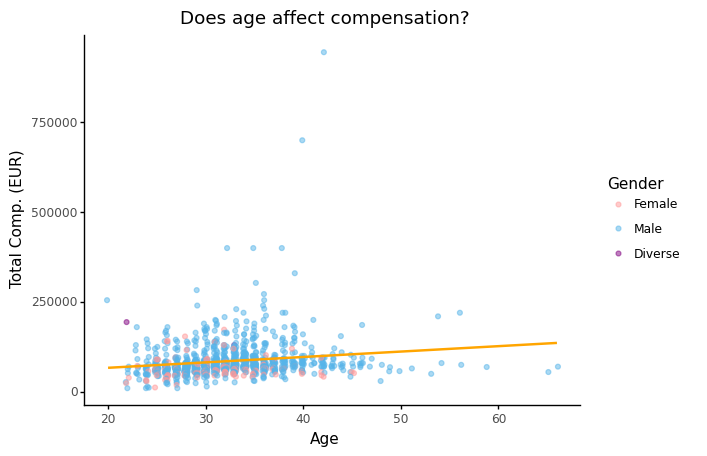

<ggplot: (129534320604)>

In [565]:
ggplot(df_age_yearlysalary, aes("Age", "Total comp", color = "Gender")) + geom_point(alpha = 0.5, position = position_jitter(width = 0.2, height = 0.0)) + geom_smooth(method = "ols", color = "orange", se = False) + labs(title = "Does age affect compensation?", x = "Age", y = "Total Comp. (EUR)") + scale_color_manual(breaks = ["Female", "Male", "Diverse"],
                        values=["#FF9999", "#56B4E9", "purple"]) + theme_classic()

Since the values are very spread out on the y axis, we apply a log transformation to the compensation variable. This means we are also showing the return of age upon one's compensation.

In [566]:
df_age_yearlysalary["log10_Total_comp"] = np.log10(df_age_yearlysalary["Total comp"])

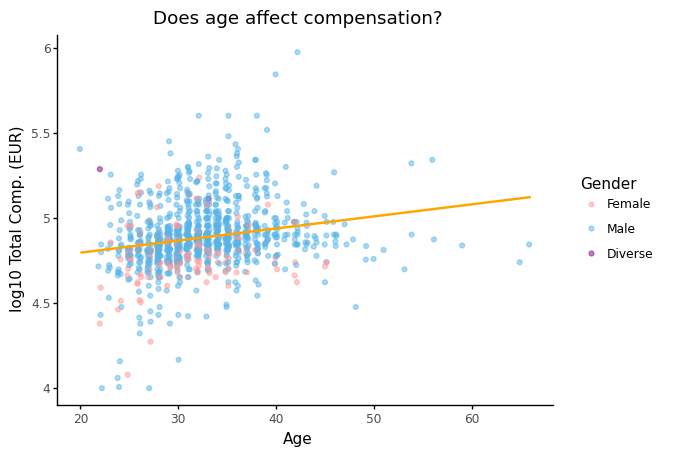

<ggplot: (129530389014)>

In [567]:
ggplot(df_age_yearlysalary, aes("Age", "log10_Total_comp", color = "Gender")) + geom_point(alpha = 0.5, position = position_jitter(width = 0.2, height = 0.0)) + geom_smooth(method = "ols", color = "orange", se = False) + labs(title = "Does age affect compensation?", x = "Age", y = "log10 Total Comp. (EUR)") + scale_color_manual(breaks = ["Female", "Male", "Diverse"],
                        values=["#FF9999", "#56B4E9", "purple"]) + theme_classic()

From the graphs above, we can observe that there is an upwards trend with compensation and age. Is this trend significant, however?

In [568]:
model1 = smf.ols("log10_Total_comp ~ Age", df_age_yearlysalary).fit(cov_type = "HC3")
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log10_Total_comp   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     29.67
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           6.40e-08
Time:                        20:02:07   Log-Likelihood:                 263.22
No. Observations:                1038   AIC:                            -522.4
Df Residuals:                    1036   BIC:                            -512.6
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6550      0.043    108.719      0.000       4.571       4.739
Age            0.0071      0.001      5.447      0.000       0.005       0.010
==============================================================================
Omnibus:                      102.652   Durbin-Watson:                   0.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              541.660
Skew:                           0.271   Prob(JB):                    2.40e-118
Kurtosis:                       6.497   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

We can see that while the coefficient for Age is significant, this model only explains about 4% of the total variation in log10 Total compensation.

# Analysis of Compensation in Current Period vs a Year Ago

Our goal is to find out whether there has been a significant change in compensation from a year ago. 

In [569]:
df_2 = df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country", "Annual bonus+stocks one year ago. Only answer if staying in same country"]].copy()
df_2.columns = ["Yearly salary", "Bonus", "Yearly salary yr ago", "Bonus yr ago"]

In [570]:
df_2.sample(5, random_state=33)

,Yearly salary,Bonus,Yearly salary yr ago,Bonus yr ago
727,90000.0,0.0,104000.0,10000
645,68000.0,8000.0,60000.0,8000
877,52500.0,0.0,No Response,No Response
2,120000.0,120000.0,100000.0,100000
805,65000.0,3250.0,No Response,No Response


Not all rows contain enough information, so we will filter those out.

In [571]:
#Some extra cleaning
df_2 = df_2.loc[(df_2["Yearly salary yr ago"] != "No Response") & (df_2["Bonus yr ago"] != "No Response") & (df_2["Bonus yr ago"] != "learning budget, bvg, gym, food")]
df_2["Bonus yr ago"] = df_2["Bonus yr ago"].replace("No", 0)
df_2.sample(5, random_state = 33)

,Yearly salary,Bonus,Yearly salary yr ago,Bonus yr ago
251,63500.0,63500.0,60000.0,60000
531,63000.0,0.0,42000.0,46000
609,74000.0,11000.0,72000.0,5000
503,78000.0,0.0,78000.0,0
447,83000.0,17000.0,80000.0,10000


In [572]:
#The following two cells ensure that we are adding numbers and not strings
df_2["Yearly salary yr ago"] = pd.to_numeric(df_2["Yearly salary yr ago"])
df_2["Bonus yr ago"] = pd.to_numeric(df_2["Bonus yr ago"])

In [573]:
df_2["Total comp"] = df_2["Yearly salary"] + df_2["Bonus"]
df_2["Total comp yr ago"] = df_2["Yearly salary yr ago"] + df_2["Bonus yr ago"]

In [574]:
#Transforming data so that there's a factor column
df_3 = pd.DataFrame(df_2["Total comp"].copy())
df_3["When"] = "Current"
df_4 = pd.DataFrame(df_2["Total comp yr ago"].copy())
df_4.columns = ["Total comp"]
df_4["When"] = "Year ago"
df_5 = pd.concat([df_3, df_4], axis = 0)
df_5.sample(5, random_state = 333)

,Total comp,When
744,95000.0,Current
542,74000.0,Current
789,160000.0,Year ago
137,75000.0,Year ago
114,100000.0,Year ago


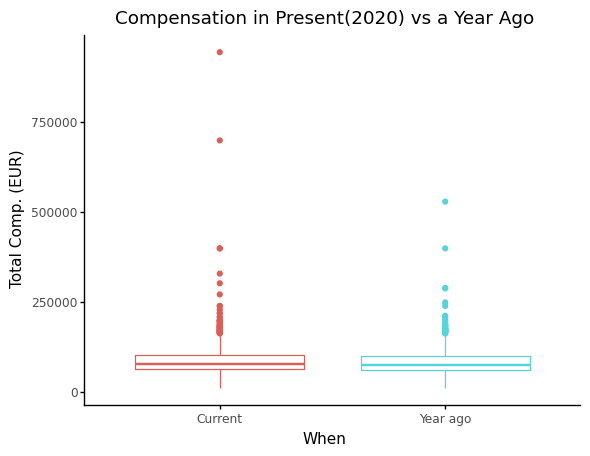

<ggplot: (129531261133)>

In [575]:
ggplot(df_5, aes(x = "When", y = "Total comp", color = "When")) + geom_boxplot() + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "Total Comp. (EUR)") + theme_classic() + guides(color = False)

Again, we will log transform Total compensation.

In [576]:
df_5["log10 Total comp"] = np.log10(df_5["Total comp"])

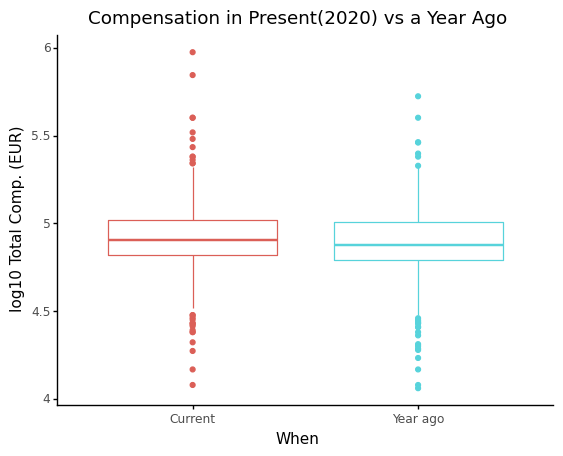

<ggplot: (129534305247)>

In [577]:
ggplot(df_5, aes(x = "When", y = "log10 Total comp", color = "When")) + geom_boxplot() + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "log10 Total Comp. (EUR)") + theme_classic() + guides(color = False)

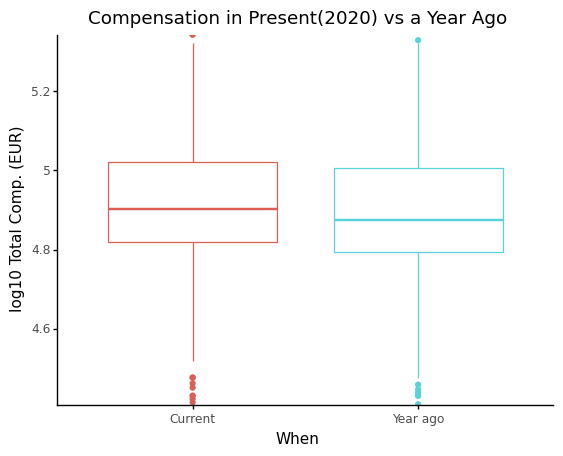

<ggplot: (129535590358)>

In [578]:
#Zoomed in version of graph above, no outliers removed
ggplot(df_5, aes(x = "When", y = "log10 Total comp", color = "When")) + geom_boxplot() + coord_cartesian(ylim = [df_5["log10 Total comp"].quantile(.025), df_5["log10 Total comp"].quantile(.975)]) + labs(title = "Compensation in Present(2020) vs a Year Ago", x = "When", y = "log10 Total Comp. (EUR)") + theme_classic() + guides(color = False)

It seems like there was a change in compensation from a year ago. Does it represent a significant level of change?

In [579]:
stats.shapiro(df_2["Total comp"])

ShapiroResult(statistic=0.5692780017852783, pvalue=3.24896605539325e-34)

In [580]:
stats.shapiro(df_2["Total comp yr ago"])

ShapiroResult(statistic=0.7864558696746826, pvalue=7.463078991006438e-26)

Data clearly isn't normal, so we can't use a paired difference t-test. 

In [581]:
stats.wilcoxon(df_2["Total comp"], df_2["Total comp yr ago"])

WilcoxonResult(statistic=16888.0, pvalue=2.4442092860863012e-29)

It seems like the median difference in total compensation isn't 0

# Analysis of number of technologies and compensation

We are interested in learning whether knowing more technologies significantly adds to one's compensation

To prepare the data for this analysis, we need to define some helper functions and use them to translate the strings to numbers with pd.apply

In [582]:
def split_str_at_comma(string):
    return [x.strip().lower() for x in string.split(",")]
def count_tech(tech_list):
    x = set(tech_list)
    if "No Response" in x:
        return len(x) - 1
    else:
        return len(x)

In [585]:
df_tech_analysis = df[["Yearly brutto salary (without bonus and stocks) in EUR", "Yearly bonus + stocks in EUR", "Your main technology / programming language", "Other technologies/programming languages you use often"]].copy()
df_tech_analysis.columns = ["Yearly salary", "Bonus", "Main tech", "Other tech"]
df_tech_analysis["Total_comp"] = df_tech_analysis["Yearly salary"] + df_tech_analysis["Bonus"]
df_tech_analysis["log10_Total_comp"] = np.log10(df_tech_analysis["Total_comp"])

In [586]:
a = df_tech_analysis["Other tech"].apply(split_str_at_comma)
b = df_tech_analysis["Main tech"].apply(split_str_at_comma)
c = a + b
print(c)

641                  [javascript / typescript, react.js]
518                                 [no response, swift]
662                                           [.net, c#]
469                           [python, c/c++, docker, c]
359                                [python, c/c++, java]
                             ...                        
561                            [java / scala, sql, ruby]
939                                     [python, python]
304                              [python, c/c++, python]
725    [javascript / typescript, .net, sql, docker, ....
813    [python, javascript / typescript, sql, aws, do...
Length: 1038, dtype: object


In [587]:
d = c.apply(count_tech)
print(d)

641    2
518    2
662    2
469    4
359    3
      ..
561    3
939    1
304    2
725    4
813    6
Length: 1038, dtype: int64


In [588]:
df_tech_analysis["Number_of_technologies"] = d

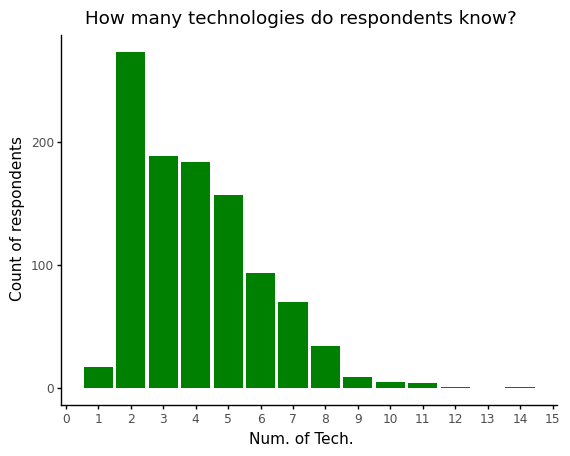

<ggplot: (129537289268)>

In [589]:
ggplot(df_tech_analysis, aes("Number_of_technologies")) + geom_bar(fill = "green") + scale_x_continuous(breaks = np.arange(16)) + labs(title = "How many technologies do respondents know?", x = "Num. of Tech.", y = "Count of respondents") + theme_classic()

It seems most respondents know 5 or less technologies

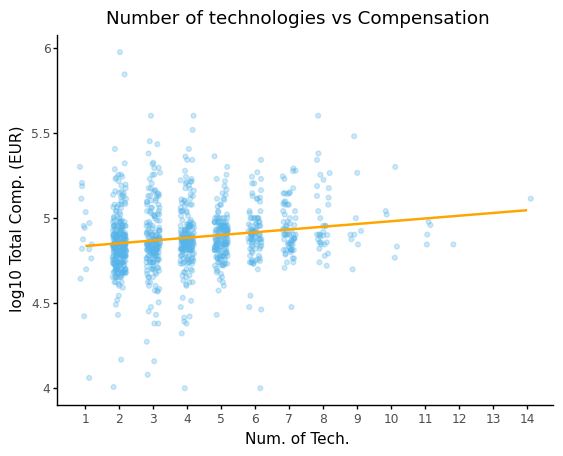

<ggplot: (129537263523)>

In [590]:
ggplot(df_tech_analysis, aes("Number_of_technologies", "log10_Total_comp")) + geom_point(alpha = 0.3, position = position_jitter(width = 0.2, height = 0.0), color = "#56B4E9") + stat_smooth(method = "ols", color = "orange", se = False) + scale_x_continuous(breaks = np.arange(16)) + labs(title = "Number of technologies vs Compensation", x = "Num. of Tech.", y = "log10 Total Comp. (EUR)") + theme_classic()

We can see that there's some sort of positive relationship between number of technologies and total compensation. 

In [591]:
model2 = smf.ols("log10_Total_comp ~ Number_of_technologies", df_tech_analysis).fit(cov_type = "HC3")
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       log10_Total_comp   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     29.08
Date:                Sun, 03 Apr 2022   Prob (F-statistic):           8.62e-08
Time:                        20:03:33   Log-Likelihood:                 254.65
No. Observations:                1038   AIC:                            -505.3
Df Residuals:                    1036   BIC:                            -495.4
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4.8201      0.014    341.250      0.000       4.792       4.848
Number_of_technologies     0.0162      0.003      5.392      0.000       0.010       0.022
==============================================================================
Omnibus:                      122.013   Durbin-Watson:                   0.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              846.833
Skew:                           0.269   Prob(JB):                    1.30e-184
Kurtosis:                       7.392   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

However, using number of technologies as a predictor for compensation isn't as good (R-squared = 0.027)

# Analysis of cities

In [592]:
df["City"].unique()

array(['Berlin', nan, 'Munich', 'Zurich', 'Cologne', 'Hamburg',
       'Frankfurt', 'Salzburg', 'London', 'Milan', 'Minsk', 'Moscow',
       'Amsterdam', 'Stuttgart', 'Schleswig-Holstein', 'Copenhagen',
       'Prague', 'Heilbronn', 'Rosenheim', 'Mannheim', 'Dusseldorf',
       'Karlsruhe', 'Dublin', 'Luttich', 'Dortmund', 'Bodensee', 'Vienna',
       'Stockholm', 'Walldorf', 'Heidelberg', 'Paris', 'Braunschweig',
       'Ingolstadt', 'Den Haag', 'Würzburg', 'Wolfsburg', 'Nuremberg',
       'Hildesheim', 'Bölingen', 'Aachen', 'Friedrichshafen',
       'Boeblingen', 'Cracow', 'Darmstadt', 'Regensburg', 'Helsinki',
       'Konstanz', 'Sofia', 'Siegen', 'Dresden', 'Innsbruck', 'Leipzig',
       'Kyiv', 'Brunswick', 'Bonn', 'Lübeck', 'Bielefeld', 'Jena',
       'Tallinn', 'Warsaw', 'Paderborn', 'Rome', 'Kempten', 'Münster',
       'Utrecht', 'Tuttlingen', 'Ulm', 'Brussels', 'Cambridge',
       'Hannover', 'Madrid', 'Ansbach', 'Barcelona', 'Saarbrücken',
       'Krakow', 'Sevilla', 'Murnau 

In [593]:
top_cities = df.groupby("City")["Age"].count().sort_values(ascending = False).reset_index()
top_cities.columns = ["City", "Number_of_Responses"]

In [594]:
top_cities.head()

,City,Number_of_Responses
0,Berlin,566
1,Munich,204
2,Frankfurt,35
3,Hamburg,34
4,Stuttgart,24


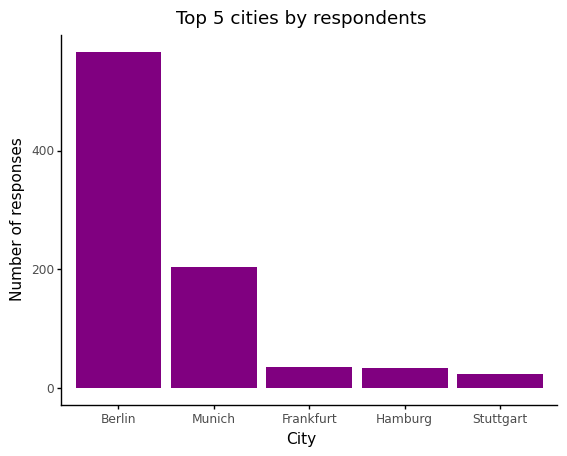

<ggplot: (129537262312)>

In [595]:
ggplot(top_cities.iloc[:5], aes(x = "reorder(City, -Number_of_Responses)", y = "Number_of_Responses")) + geom_bar(stat = "identity", fill = "purple") + labs(title = "Top 5 cities by respondents", x = "City", y = "Number of responses") + theme_classic()

Berlin and Munich are where the majority of survey respondents are located